<h1>Visualizing the Design Space of an Engine Blade </h1>

In [1]:
%matplotlib inline
from equadratures import *
import numpy as np
from matplotlib.mlab import griddata

Blades in modern jet engines are often parameterized with 200-300 design variables. Any exploration of such a vast design space using *standard* approaches may prove to be futile. Dimension reduction---in this case using a new set of ideas called *active subspaces*---is valuable as it seeks to find **dominant directions** along which a given output varies the most. In this notebook we will demonstrate how to use the dimension reduction utilities in the Effective Quadratures. First, let's upload some data. The data used here is a set of CFD runs for a blade, parameterized with 25 variables. The distribution of the CFD evaluations within the input space is uniform, as they were carried out using Latin hypercube sampling. This notebook is based on prior work in [1].

In [2]:
X = np.loadtxt('X.dat')
fX = np.loadtxt('Y.dat')

The X data comprises of various combinations of the 25 design variables (normalized between -1 to 1), while the fX data is the normalized efficiency. Our first task is to set up the necessary Effective Quadratures objects starting from the parameter, to the basis.

In [3]:
parameters = []
totalorders = []
dimensions = 25
maxorder = 2
for i in range(0, 25):
    parameter = Parameter(distribution='Uniform', lower=-1., upper=1., order=maxorder)
    parameters.append(parameter)
    totalorders.append(maxorder)
mybasis = Basis('Total order', totalorders)    

Now, we set up a "Polyreg" object!

In [4]:
Poly = Polyreg(parameters, mybasis, training_inputs=X, training_outputs=fX)
Poly.computeCoefficients()

Next, we compute the active subspaces!

In [5]:
e, W = computeActiveSubspaces(Poly, samples=X)

Now, we plot the eigenvalues to see how many active variables we need...

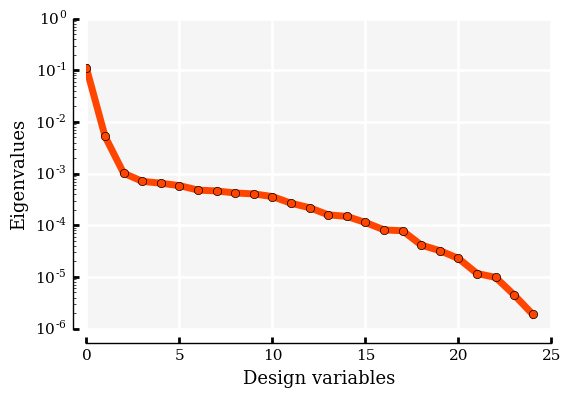

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.semilogy(np.arange(0, 25), np.abs(e), c='orangered', lw=5, marker='o')
adjust_spines(ax, ['left', 'bottom'])
plt.ylim([10**(-6), 1])
plt.xlabel('Design variables', fontsize=13)
plt.ylabel('Eigenvalues', fontsize=13)
plt.show()

From this plot, the first two eigenvectors seem suitable.

In [7]:
active1 = np.dot( X , W[:,0] ) 
active2 = np.dot( X , W[:,1] )

Finally, we plot the result! Our 25 dimensional function turns out to be a quadratic in 2 dimensions!

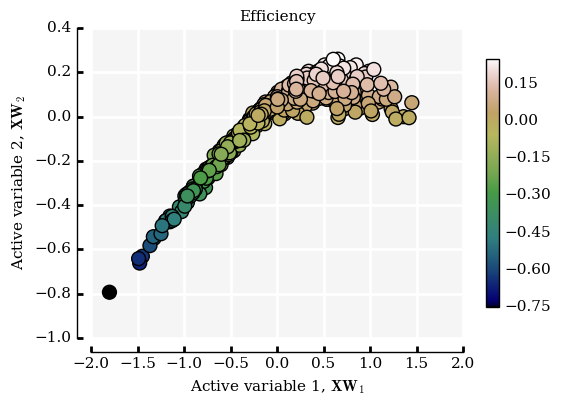

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(True)
cax = ax.scatter(active1, fX, c=fX, marker='o', s=100, vmin=-0.75, vmax=0.25)
cbar = plt.colorbar(cax, extend='neither', spacing='proportional', orientation='vertical', shrink=0.8)
ax.set_xlabel('Active variable 1, $\mathbf{XW_{1}}$')
ax.set_ylabel('Active variable 2, $\mathbf{XW_{2}}$')
plt.xlim([-2.0, 2.0])
adjust_spines(ax, ['left', 'bottom'])
ax.set_title('Efficiency')
plt.show()

To aid our visualization, we can also view the above data as a contour plot...

//anaconda/lib/python2.7/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
//anaconda/lib/python2.7/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


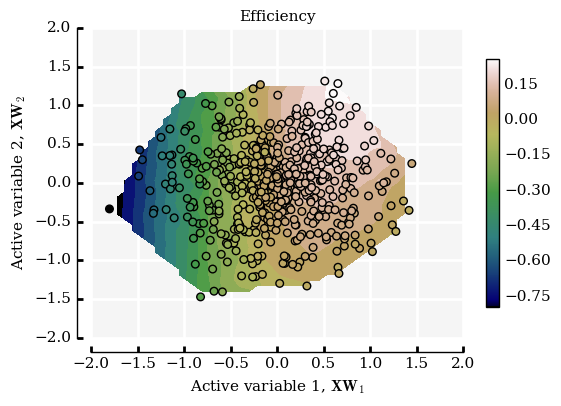

In [9]:
def grid(x, y, z, resX=40, resY=40):
    "Convert 3 column data to matplotlib grid"
    xi = np.linspace(min(x), max(x), resX)
    yi = np.linspace(min(y), max(y), resY)
    Z = griddata(x, y, z, xi, yi, interp='linear')
    X, Y = np.meshgrid(xi, yi)
    return X, Y, Z

X, Y, Z = grid(active1, active2, fX)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
cax = plt.contourf(X, Y, Z, 20, vmin=-0.75, vmax=0.25)
cax = ax.scatter(active1, active2,c=fX, marker='o', s=30)
cbar = plt.colorbar(cax, extend='neither', spacing='proportional', orientation='vertical', shrink=0.8)
ax.set_xlabel('Active variable 1, $\mathbf{XW_{1}}$')
ax.set_ylabel('Active variable 2, $\mathbf{XW_{2}}$')
plt.xlim([-2.0, 2.0])
plt.ylim([-2.0, 2.0])
adjust_spines(ax, ['left', 'bottom'])
ax.set_title('Efficiency')
plt.show()

<h3> References </h3>

[1] Seshadri, P., Shahpar, S., Constantine, P., Parks, G. and Adams, M. "Turbomachinery Active Subspace Performance Maps." Journal of Turbomachinery 140, no. 4 (2018): 041003.